In [1]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import numpy as np

In [2]:
df = pd.read_csv('./assignments_from_pool_Trash.tsv', sep="\t")

In [3]:
df = df.drop(columns=['GOLDEN:ad', 'GOLDEN:not_ad', 'GOLDEN:ban_insult_hard', 'GOLDEN:ban_shock_content', 'GOLDEN:ban_shock_content',
'HINT:text', 'HINT:default_language', 'ASSIGNMENT:link', 'ASSIGNMENT:task_id', 'ASSIGNMENT:assignment_id', 'ASSIGNMENT:status'
])


In [4]:
df = df.fillna(0)
def f(row):
    if row['OUTPUT:ad'] == 'yes':
        val = 'ad'
    elif row['OUTPUT:not_ad'] != 0:
        val = 'not_ad'
    elif row['OUTPUT:ban_insult_hard'] != 0:
        val = 'ban_insult_hard'
    elif row['OUTPUT:ban_shock_content'] != 0:
        val = 'ban_shock_content'    
    else:
        val = ' '
    return val

df['OUTPUT:label'] = df.apply(f, axis=1)



In [5]:
df.nunique ()
df.head()

,INPUT:label,INPUT:comment,INPUT:task-id,OUTPUT:ad,OUTPUT:not_ad,OUTPUT:ban_insult_hard,OUTPUT:ban_shock_content,ASSIGNMENT:worker_id,OUTPUT:label
0,not_ad,В Воронеже появятся первые автобусы с кондицио...,473,yes,0,0,0,15b25eaab3e157c165a3666dc8ee4d82,ad
1,ban_shock_content,На Ленинском проспекте неизвестные открыли стр...,382,yes,0,0,0,15b25eaab3e157c165a3666dc8ee4d82,ad
2,ban_shock_content,Самоубийца на стройке. Парень-гастрабайтер пры...,328,yes,0,0,0,15b25eaab3e157c165a3666dc8ee4d82,ad
3,ban_shock_content,"В Уфе мужчина упал на арматуру. 11 августа, ок...",369,yes,0,0,0,15b25eaab3e157c165a3666dc8ee4d82,ad
4,ad,Судебное и внесудебное (упрощенное) банкротств...,76,yes,0,0,0,15b25eaab3e157c165a3666dc8ee4d82,ad


In [6]:
df = df.drop(columns=['OUTPUT:ad', 'OUTPUT:not_ad', 'OUTPUT:ban_insult_hard', 'OUTPUT:ban_shock_content'])

In [7]:
df.nunique ()

INPUT:label               4
INPUT:comment           500
INPUT:task-id           500
ASSIGNMENT:worker_id     48
OUTPUT:label              4
dtype: int64

In [8]:
#сохранения в tsv
df.to_csv('Trash.tsv', sep="\t", index=False)

In [9]:
df[df['INPUT:label'] == df['OUTPUT:label']].count()[0]

877

In [10]:
df[df['INPUT:label'] != df['OUTPUT:label']].count()[0]

623

In [15]:
# 41% неправильных ответов
df[df['INPUT:label'] != df['OUTPUT:label']].count()[0] / 1500

0.41533333333333333

1027

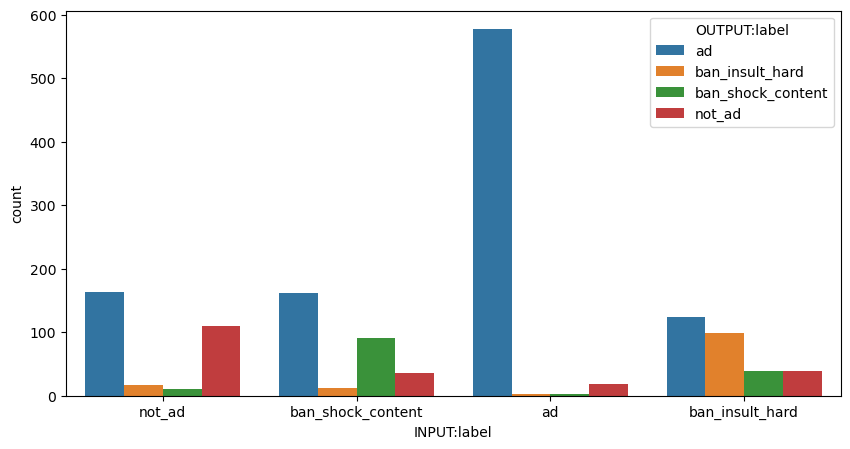

In [13]:
#Из графика видно, что ответы исполнителей правильный только на тексты с рекламой. И везеде доминирует быстрый ответ реклама
_, axes = plt.subplots(1, sharey=True, figsize=(10,5))


sns.countplot(x='INPUT:label', hue='OUTPUT:label', data=df);